# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
    
for col in data.columns:
    print '{}\t\t: count: {}, min: {:.0f}, max: {:.0f}, mean: {:.0f}, std: {:.0f}'.format(col, \
            data[col].count(), data[col].min(), data[col].max(),data[col].mean(),data[col].std()) 

Wholesale customers dataset has 440 samples with 6 features each.
Fresh		: count: 440, min: 3, max: 112151, mean: 12000, std: 12647
Milk		: count: 440, min: 55, max: 73498, mean: 5796, std: 7380
Grocery		: count: 440, min: 3, max: 92780, mean: 7951, std: 9503
Frozen		: count: 440, min: 25, max: 60869, mean: 3072, std: 4855
Detergents_Paper		: count: 440, min: 3, max: 40827, mean: 2881, std: 4768
Delicatessen		: count: 440, min: 3, max: 47943, mean: 1525, std: 2820


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [44,134,333]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

perc_samples = samples.transpose()
perc_samples = perc_samples.apply(lambda x: x/x.sum())
perc_samples = perc_samples.transpose()
display (perc_samples)

perc_data = data.transpose()
perc_data = perc_data.apply(lambda x: x/x.sum())
perc_data = perc_data.transpose()

display (perc_data.describe())





Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9670,7027,10471,541,4618,65
1,7388,1882,2174,720,47,537
2,8565,4980,67298,131,38102,1215


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.298531,0.216936,0.323259,0.016702,0.142566,0.002007
1,0.579542,0.147631,0.170537,0.056479,0.003687,0.042124
2,0.071202,0.041400,0.559460,0.001089,0.316749,0.010101


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.375016,0.167512,0.229676,0.105769,0.074225,0.047801
std,0.248176,0.113058,0.146425,0.113070,0.080728,0.043655
min,0.000128,0.005009,0.000111,0.000389,0.000111,0.000054
25%,0.142780,0.075853,0.105431,0.027571,0.013251,0.017858
50%,0.369930,0.143903,0.207749,0.066167,0.034558,0.038275
75%,0.580175,0.237769,0.328455,0.145668,0.126728,0.062932
max,0.951117,0.631162,0.738939,0.663223,0.533080,0.313002


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

### Answer Q1:

What we see first is that the three samples have a very different overall spending. So I normalized their spendings/product group against there overall spending. So the figures are easier to compare:

<table>
<tr>
    <th>spl</th>
    <th>Fresh</th>
    <th>Milk</th>
    <th>Grocery</th>
    <th>Frozen</th>
    <th>Det,Paper</th>
    <th>Delicatessen</th>
</tr>
<tr>
    <td>0</td>
    <td>&lt;Q2</td>
    <td>Q3</td>
    <td>Q3</td>
    <td>Q1</td>
    <td>Q3 </td>
    <td>0%</td>
</tr>
<tr>
    <td>1</td>
    <td>Q3</td>
    <td>Q2</td>
    <td>&lt;Q2</td>
    <td>Q2</td>
    <td>0%</td>
    <td>Q2</td>
</tr>
<tr>
    <td>2</td>
    <td>&lt;&lt;Q1</td>
    <td>&lt;&lt;Q1</td>
    <td>&gt;&gt;Q3</td>
    <td>0%</td>
    <td>&gt;&gt;Q3 </td>
    <td>&lt;Q1</td>
</tr>
</table>


All three samples show different behavior:
Samples 1 spends  60% on fresh food, so I would assume that this is a restaurant.

Samples 0 and 2 spend 46%/88% on Grocery and Detergents: so they can be categorized as retailer - 
but with different kinds of customers: Sample 0 has a relevant part of fresh food, Sample has nearly
no fresh food.





### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in data.columns:
    X = pd.DataFrame(data,copy=True)
    y = X[col]
    X.drop([col], axis = 1, inplace = True)
    #print col, '\n',X.head(1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=33, max_depth=4)
    regressor.fit(X_train,y_train)


    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    print 'column:', col, ' score:', score
    

column: Fresh  score: -0.107979929604
column: Milk  score: 0.431992057812
column: Grocery  score: 0.722092001535
column: Frozen  score: 0.118996765653
column: Detergents_Paper  score: 0.578558017871
column: Delicatessen  score: -0.861635423216


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

### Answer Q2:

It doesn't matter which feature you try to predict - figures are only different, but no feature you can really predict:

* "Fresh" and "Delicatessen": model fails to fit the data: it cannot predicted at all from the other features => important to understand customers behavior.
* "Frozen": very low score: nearly impossible to be predicted => important to understand customers behavior
* "Grocery": has the highest score => even if it is not high enough to predict it completley, I would assume strong dependencies to some other features.
* "Milk", "Detergents": lower than "grocery", but high enough to assume some dependencies. 



### Addon after review:

Next code box is a proposal from first review.

Thanks a lot to reviewer!
It shows the correlations very clearly.


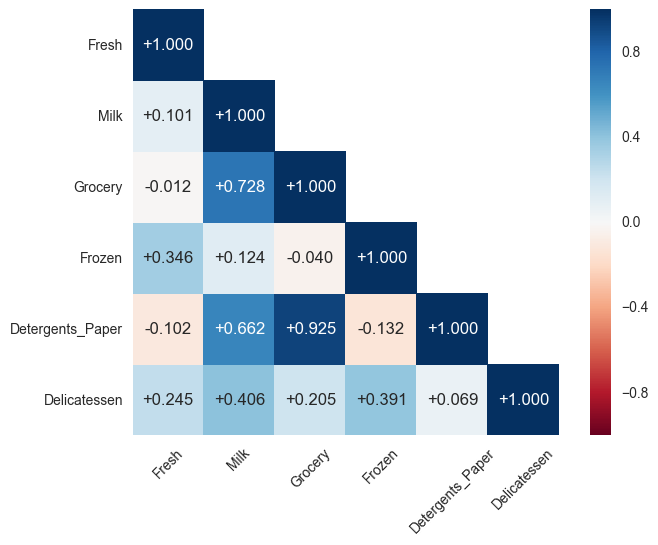

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

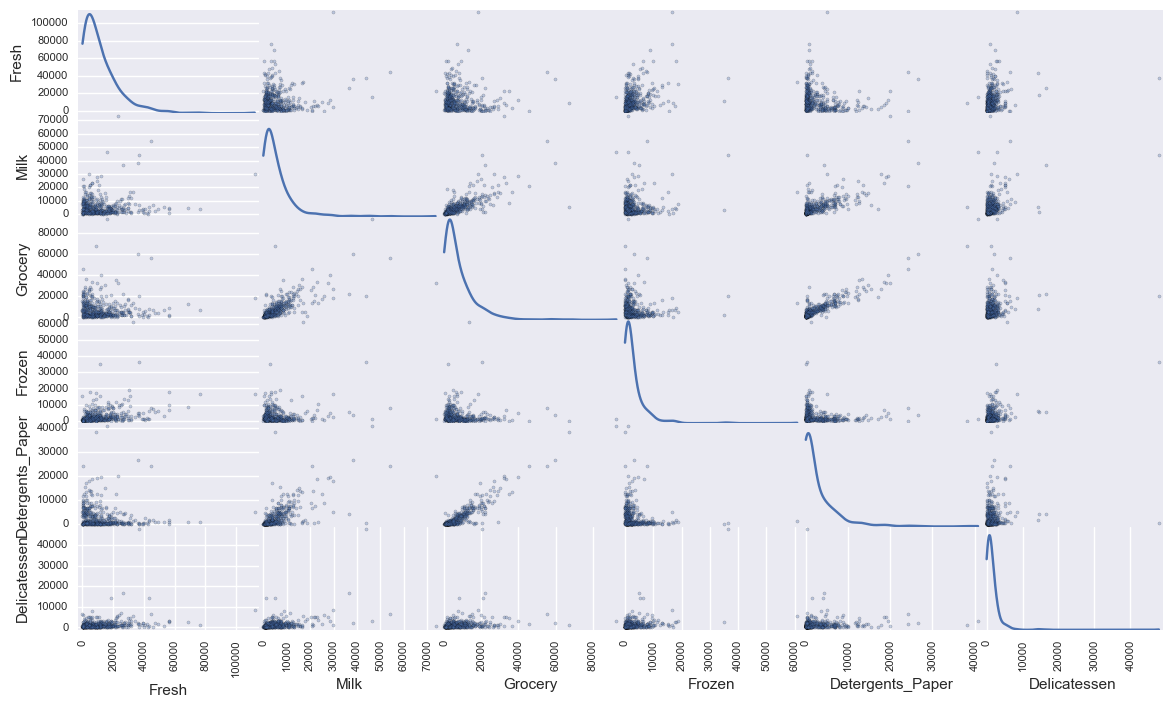

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

### Answer Q3:
Curves seem to be one half of a normal distribution - most points are in the lower areas- between 0 and 10000.

Scatter plot proves the findings from Q2:
As result of Q2 I stated: "Milk", "Detergents", "Grocery" are candidates for dependancies. 

In the plots we see similiar pictures:
* "Grocery" <-> "Detergents": relatively clear line: if somebody buys "Grocery", most time he buys "Detergents" as well.
* "Milk" <-> ("Detergents", "Grocery") can be interpreted more as a line than a circle. This fits to the prediction score form Q2


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

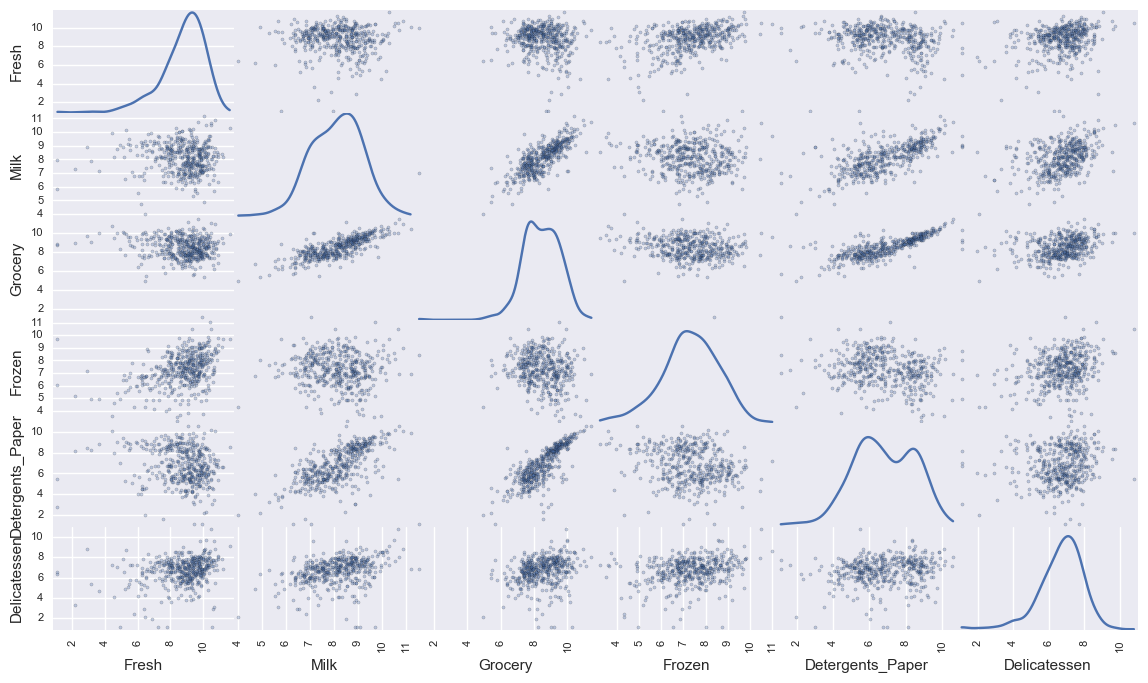

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
pd.options.display.float_format = '{:,.2f}'.format
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.18,8.86,9.26,6.29,8.44,4.17
1,8.91,7.54,7.68,6.58,3.85,6.29
2,9.06,8.51,11.12,4.88,10.55,7.10


### Addon from Review:

Next 3 plots are a proposals from reviewer. 

#### Add. Plot 1: distribution of original data - are they normally distributed?

It shows that one typical characteristics of normal distribution is not fullfilled:

typical for normal distribution: mode == mean == median
for our original data we have:
mode < median < mean, because the customer segment with small overall spendings is larger then the customer segment with large overall spendings.

#### Add. Plot 2: Data after logarithmic scaling - are they normally distributed?

Still there is not really a normal distribution - but the distance between median and mean is smaller now. the mode is still != (median, mean) in most cases. The distance between mode and (median, mean) has decreased. These plots show very well that we are nearer to a normal distribution than before - because log-function works like a magnifier glass for the small values.

#### Add. Plot 3: compare the distribution of log_data

By overlaying the distribution we see better the differences between them!

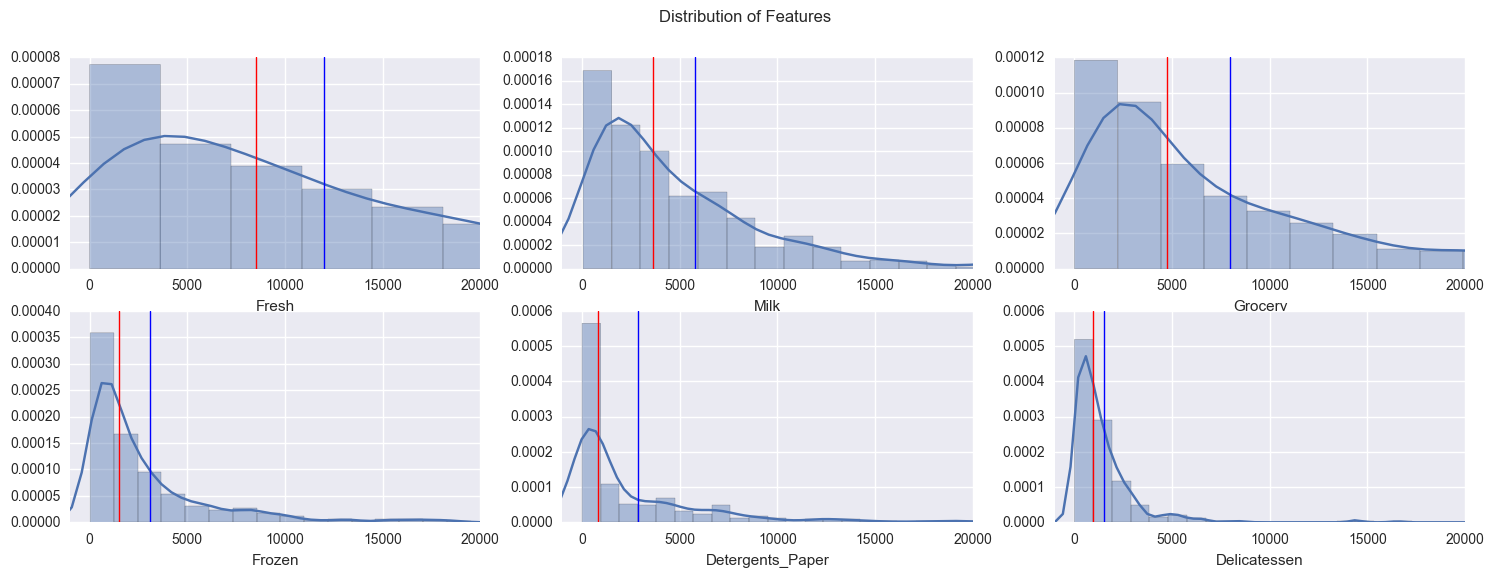

In [17]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

product_data_by_customer_df=pd.DataFrame(data)

for i, col in enumerate(product_data_by_customer_df.columns):
    feature = product_data_by_customer_df[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')



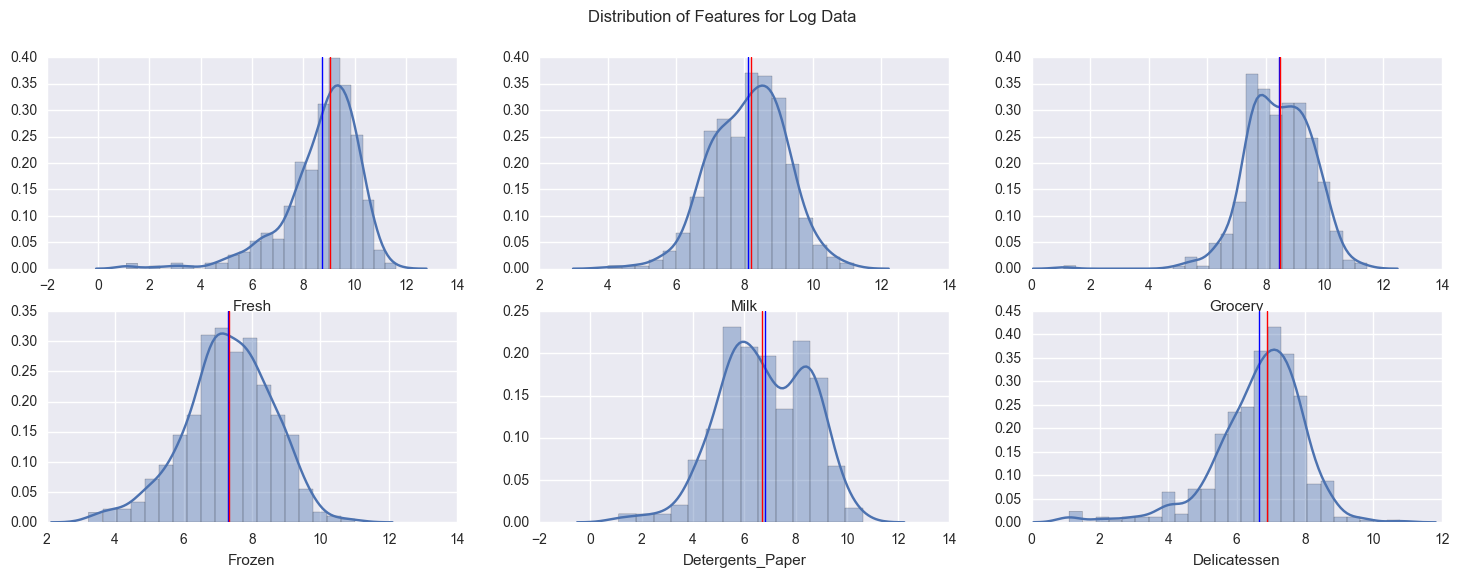

In [18]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')
log_product_data_df=pd.DataFrame(log_data)

for i, col in enumerate(log_product_data_df.columns):
    feature = log_product_data_df[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')



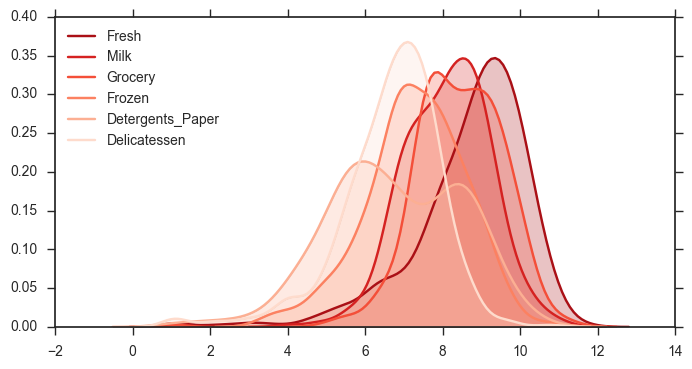

In [19]:
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best');

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Fresh : Q1-step: 5.51455083361  Q3: 12.2705718166
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.44,9.95,10.73,3.58,10.10,7.26
66,2.20,7.34,8.91,5.16,8.15,3.30
81,5.39,9.16,9.58,5.65,8.96,5.05
95,1.10,7.98,8.74,6.09,5.41,6.56
96,3.14,7.87,9.00,4.98,8.26,5.38
128,4.94,9.09,8.25,4.96,6.97,1.10
171,5.30,10.16,9.89,6.48,9.08,8.74
193,5.19,8.16,9.92,6.87,8.63,6.50
218,2.89,8.92,9.63,7.16,8.48,8.76
304,5.08,8.92,10.12,6.42,9.37,7.79


Milk : Q1-step: 5.01673296722  Q3: 11.1987283614
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.04,11.21,10.38,6.89,9.91,6.81
98,6.22,4.72,6.66,6.80,4.03,4.88
154,6.43,4.01,4.92,4.32,1.95,2.08
356,10.03,4.90,5.38,8.06,2.20,6.31


Grocery : Q1-step: 5.27575998758  Q3: 11.672709891
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
154,6.43,4.01,4.92,4.32,1.95,2.08


Frozen : Q1-step: 4.26035024816  Q3: 10.5252235842
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.43,9.66,9.72,3.50,8.85,6.07
57,8.60,9.20,9.26,3.64,8.93,7.16
65,4.44,9.95,10.73,3.58,10.10,7.26
145,10.00,9.03,10.46,3.74,9.44,8.40
175,7.76,8.97,9.38,3.95,8.34,7.44
264,6.98,9.18,9.65,4.11,8.70,7.14
325,10.40,9.73,9.52,11.02,7.15,8.63
420,8.40,8.57,9.49,3.22,8.83,7.24
429,9.06,7.47,8.18,3.85,4.43,7.82
439,7.93,7.44,7.83,4.17,6.17,3.95


Detergents_Paper : Q1-step: 1.45874266385  Q3: 12.3636993597
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
161,9.43,6.29,5.65,7.00,1.10,7.71


Delicatessen : Q1-step: 3.76959400251  Q3: 9.74900908097
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.20,7.34,8.91,5.16,8.15,3.30
109,7.25,9.72,10.27,6.51,6.73,1.10
128,4.94,9.09,8.25,4.96,6.97,1.10
137,8.03,9.00,9.02,6.49,6.58,3.58
142,10.52,8.88,9.02,8.00,3.00,1.10
154,6.43,4.01,4.92,4.32,1.95,2.08
183,10.51,10.69,9.91,10.51,5.48,10.78
184,5.79,6.82,8.46,4.30,5.81,2.40
187,7.80,8.99,9.19,8.74,8.15,1.10
203,6.37,6.53,7.70,6.15,6.86,2.89


128 	: ['Fresh', 'Delicatessen']
154 	: ['Milk', 'Grocery', 'Delicatessen']
65 	: ['Fresh', 'Frozen']
66 	: ['Fresh', 'Delicatessen']
75 	: ['Grocery', 'Detergents_Paper']
found 42 outliers over all features


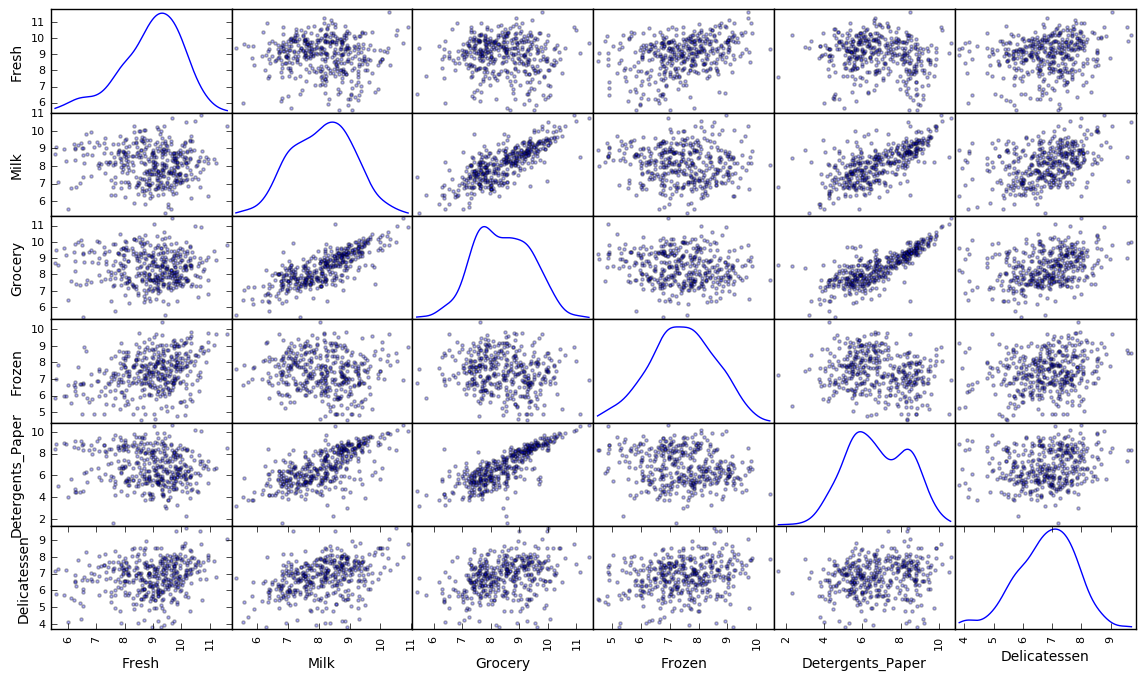

In [28]:
# For each feature find the data points with extreme high or low values
pd.options.display.float_format = '{:,.2f}'.format
outliers  = []
outliers2 ={}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print feature, ': Q1-step:', Q1-step, ' Q3:', Q3+step
    print "Data points considered outliers for the feature '{}':".format(feature)
    helper=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for i in helper.index:
        if i in outliers2:
            outliers2[i].append(feature)
        else:
            outliers2[i]=[feature]
    display(helper)
    
for key,value in outliers2.iteritems():
    if len(value)> 1:
        print key,'\t:',value
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = outliers2.keys()

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

print 'found {} outliers over all features'.format(len(outliers))


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

### Answer Q4:

over all features there where 42 outliers, some of them occuring in several dimensions:
* 128 	: ['Fresh', 'Delicatessen']
* 154 	: ['Milk', 'Grocery', 'Delicatessen']
* 65 	: ['Fresh', 'Frozen']
* 66 	: ['Fresh', 'Delicatessen']
* 75 	: ['Grocery', 'Detergents_Paper']

As result of Q2 I stated:
"Fresh" and "Delicatessen" can't be predicted out of other features. Not sure if it means anything, that we have examples of outliers which are outliers both of them.

What I really like it the scatter plot after dropping the outliers. We see the dependencies between (detergents, grocery, milk) better now.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

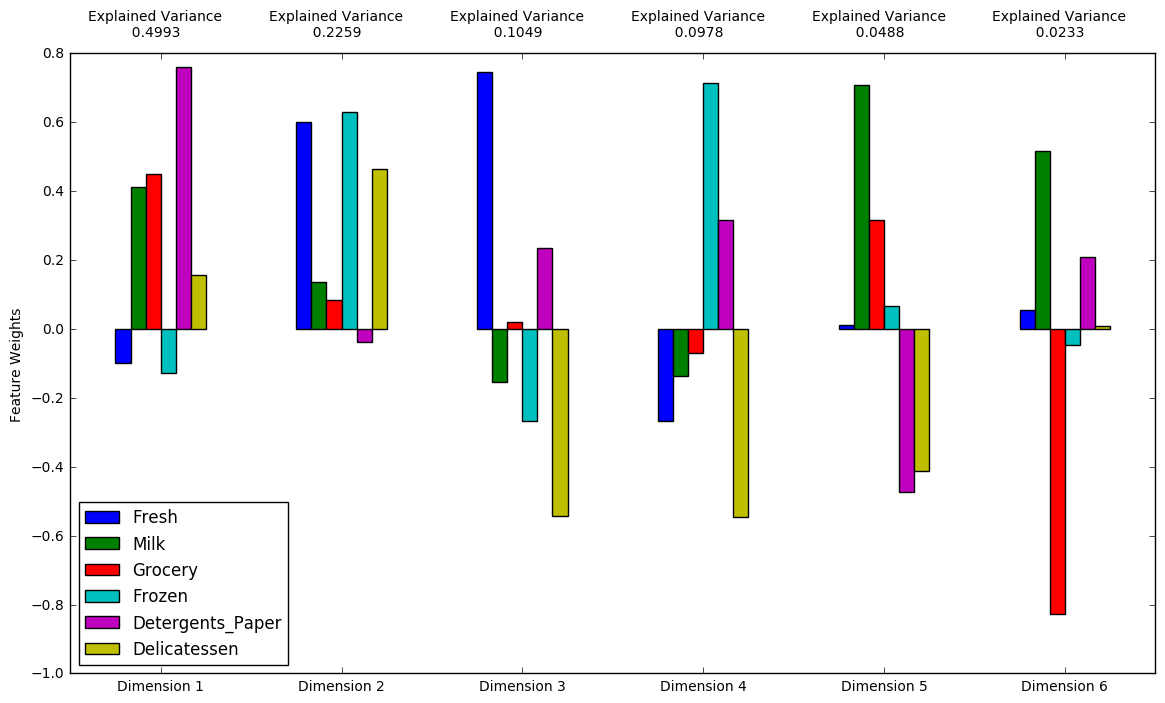

In [29]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

### Answer Q5:

sum of variance of 1st and 2nd principal component: 0.72
sum of variance of 1st, 2nd, 3rd, 4th principal component: 0.92

Let us recover the results of the scatter plot of Q3 and the predictability in Q2
Q3: Grocery and detergent are dependent, Milk may depend on grocery/detergent
Q2: delicatessen and fresh cannot be predicted, frozen has a very low score

Surprise, surprise.... :

1st principial component is highly influenced by the trio (grocery, detergent, milk)
2nd principial component mainly consists of the other trio (delicatessen, fresh, frozen)

3rd principal component may model customers buying fresh (and a little detergent) but noooo delicatessen
4th principal component seems to model customers buying frozen (and a littel detergen) but neither fresh nor delicatessen



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [30]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.64,-1.68,2.20,0.92,1.02,0.07
1,-2.77,-0.82,-0.13,-1.11,0.90,-0.27
2,4.60,-1.25,1.49,-1.08,-0.94,-1.12


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [31]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca =  PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [32]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.64,-1.68
1,-2.77,-0.82
2,4.60,-1.25


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

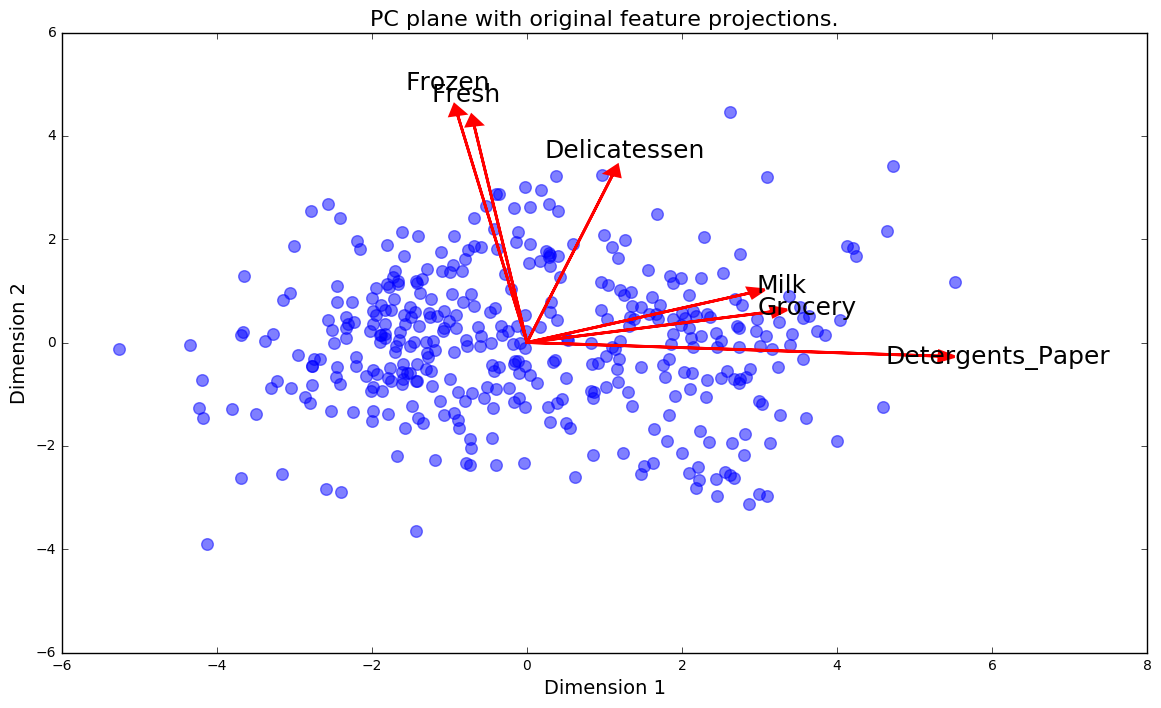

In [33]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

### Answer Q6:

##### Pro K-Means:
In (???): 
K-Means is faster.. but we have only a few points, and only 2 dimensions left. So this is no valid argument.

##### Pro GMM:
I found in http://scikit-learn.org/stable/modules/clustering.html#clustering :
<pre><code>Gaussian mixture models, useful for clustering, are described in another chapter of the documentation
dedicated to mixture models. KMeans can be seen as a special case of Gaussian mixture model 
with equal covariance per component.</code></pre>

Similiar in https://www.r-bloggers.com/k-means-clustering-is-not-a-free-lunch/:
k-means works well if <pre><code>all variables have the same variance</pre></code> 

If we remember the "full" PCA: there we saw that 
* the 1st principial component has "explained variance" 0.5
* the 2nd has "explained variance" 0.22

As variance of 1st PCA is twice the variance of the 2nd, I assume the Gaussian mixture model might be the better choice.

Same article (https://www.r-bloggers.com/k-means-clustering-is-not-a-free-lunch/):
<pre><code>What if the clusters have an uneven number of points- does that also break k-means clustering? </pre></code>
We have no glue if we can assume that our customer segments are of the same size - we know that they differ a lot in overall spending, so it is very possible that there is one customer segment containing a few customers with lot of spendings, and another one with lots of customers with little spending.

In https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian:
<pre><code>The biggest difference between K-mean and GMM in practice is: K-Mean only detect spherical cluster. GMM can adjust its self to elliptic shape cluster.</code></pre>

From the picture above (2D scatter after PCA)we already know that clustering has to do a difficult job!

And finally - 
we haven't used it yet...

==> I'll try with Gaussian mixture model

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [39]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_samples, silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
for n_clusters in range(2,10):
    clusterer = GMM(n_components=n_clusters)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", score)


('For n_clusters =', 2, 'The average silhouette_score is :', 0.44360147401514621)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.35729451424912562)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.29232710283686186)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.26574191132890002)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.30712286644732789)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.30248599193518116)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.31425465552302828)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.30853479119043969)


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

### Answer Q7:

The ranking is:
* 2 Clusters
* 3 Clusters
* 6, 7, 9 clusters

added after visualization: here 2 Clusters seem to fit better

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

('For n_clusters =', 3, 'The average silhouette_score is :', 0.35505321951057794)
('For n_clusters =', 2, 'The average silhouette_score is :', 0.44360147401514621)


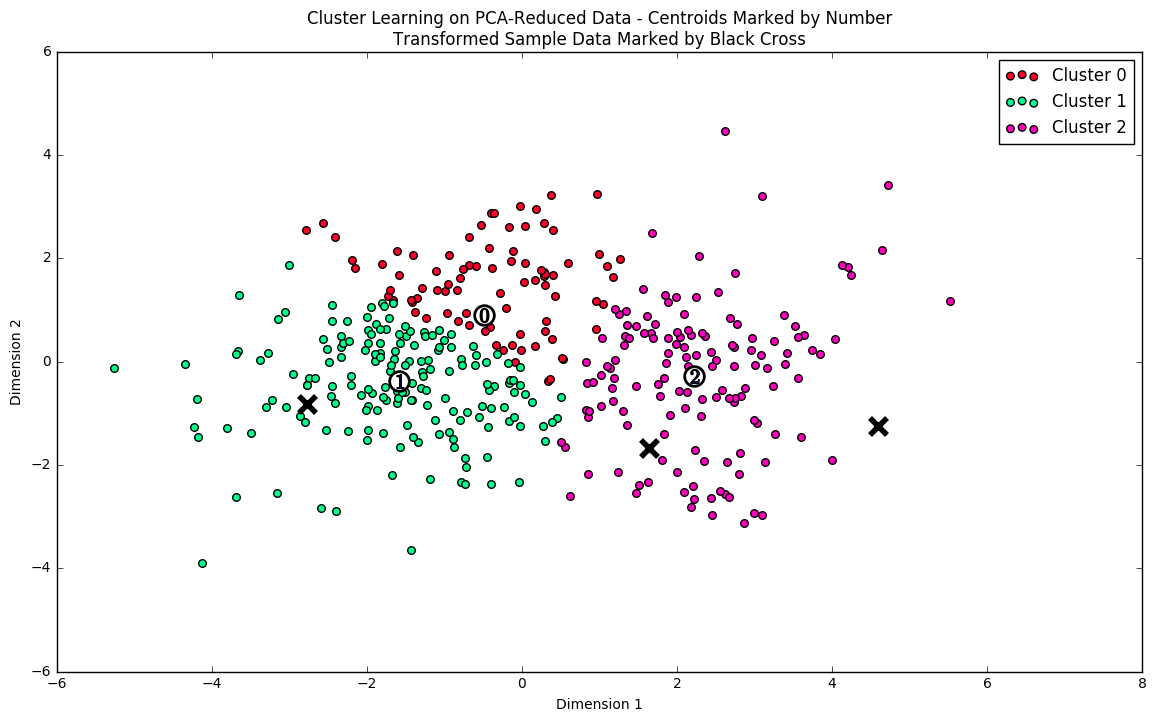

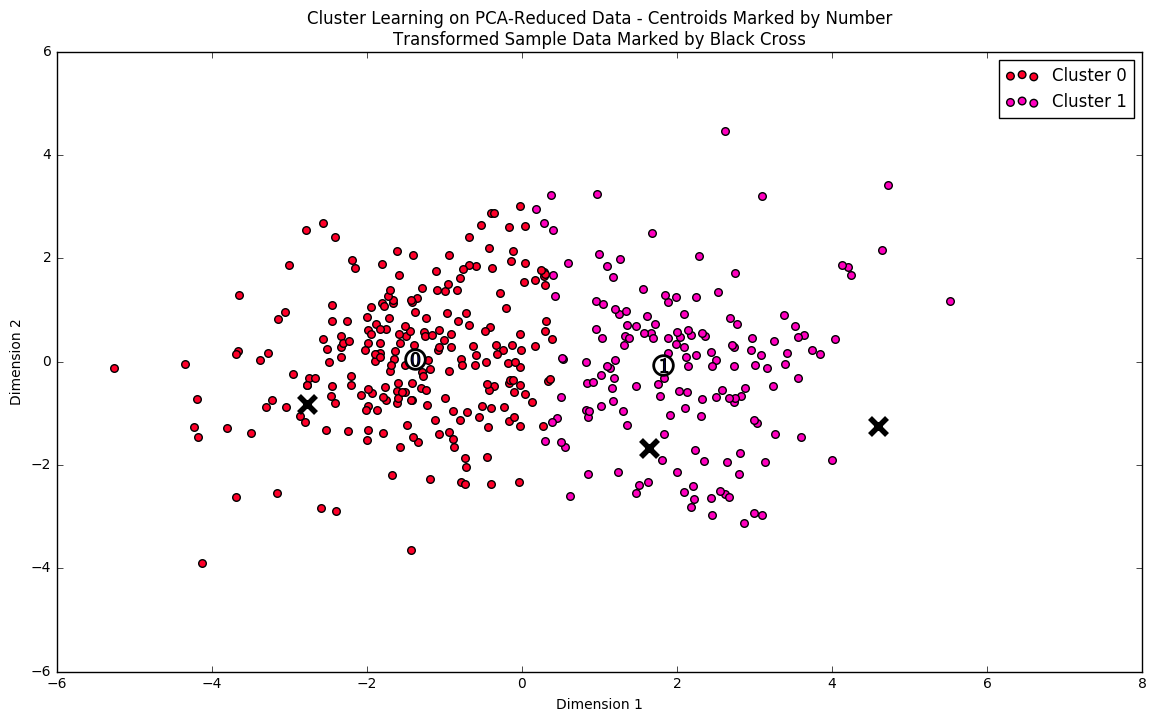

In [41]:
for n_clusters in [3,2]:
    clusterer = GMM(n_components=n_clusters)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", score)
    # Display the results of the clustering from implementation
    vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [44]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,"8,967.00","1,920.00","2,437.00","2,081.00",309.00,741.00
Segment 1,"6,079.00","7,042.00","10,241.00","1,275.00","3,546.00","1,159.00"


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,"12,000.30","5,796.27","7,951.28","3,071.93","2,881.49","1,524.87"
std,"12,647.33","7,380.38","9,503.16","4,854.67","4,767.85","2,820.11"
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,"3,127.75","1,533.00","2,153.00",742.25,256.75,408.25
50%,"8,504.00","3,627.00","4,755.50","1,526.00",816.50,965.50
75%,"16,933.75","7,190.25","10,655.75","3,554.25","3,922.00","1,820.25"
max,"112,151.00","73,498.00","92,780.00","60,869.00","40,827.00","47,943.00"


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

### Answer Q8:

comparing the average customers with Q1, Q2, Q3:

Segment 0:
fresh: 
    Segment 0: little above Q2    - Segment 1: between Q1 and Q2
Milk: 
    Segment 0: near Q1,           - Segment 1: Q3
Grocery:
    Segment 0: near Q1            - Segment 1: near Q3
Frozen:
    Segment 0: between Q2 and Q3  - Segment 1: between Q1 and Q2
Detergents_Paper:
    Segment 0: near Q1            - Segment 1: near Q3
Delicatessen:
    Segment 0: between Q1 and Q2  - Segment 1: between Q2 and Q3

Our well known trio (Milk, Grocery, Detergents) characterizes the customer segments:
Segment 0 is around Q1, Segment 1 is around Q3

Real life hypothesis:

* Segment 1 are retailers because they need so much (Milk, Grocery, Detergents)
* Segment 0 are restaurant cooking with fresh food

just a try...


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [45]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

display(samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9670,7027,10471,541,4618,65
1,7388,1882,2174,720,47,537
2,8565,4980,67298,131,38102,1215


### Answer Q9:

clearly yes.... 

As discussed already at the beginning: Sample 0 and 2 buy lots of grocery, detergents, and milk - Sample 1 buys mainly fresh food - compared to his overall spendings. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Answer Q10:

Theory:
If the wholesale distributor reduce his delivery service, this concerns mostly the fresh stuff, perhaps milk.
Reduction of delivery service will be difficult for the customer segment focus on fresh food (restaurant-segment). 

In our examples the retailers spend a lot more then the restaurant. If this is a general rule - what we haven't checked (yet), reduction of the service may be just a specialization for him: distributor reduce service and own costs, and if fresh food customers are not so important to him, it may be useful for him.

A/B-Testing:
(based on https://en.wikipedia.org/wiki/A/B_testing)
Even A/B-testing is mainly used as technique in web commerce/advertising we can use the same idea here: We collected randomly two groups (A and B) of small numbers of customers (let's assume 10 %). They should represent the behavior of all customers, so share their distribution of channel, and their typical spendings. 

Now we monitor their spendings as well as their complains in customer care over the next few months.
* Group A: same service as before
* Group B: service reduced to 3 days a week

Expected behavior:
* overall sales volume in group B will be smaller as in group A. 
* but: retailers will spend the same in group A and B
* only restaurant will buy less

The test is commercially sucessful if retailers are the big spenders, and the decrease of sales concerns only customers with small spendings.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

### Answer Q11:
When training the supervised learner we take the cluster as label for a sample.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

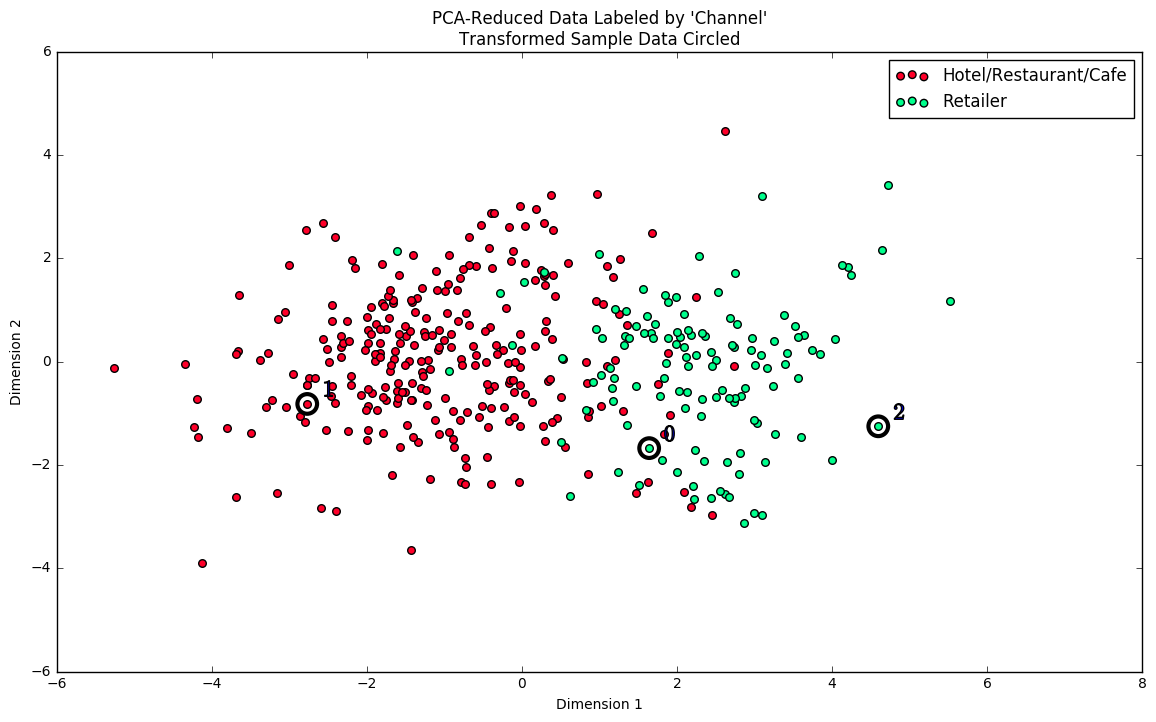

In [46]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

### Answer Q12:

It was not to bad - mainly it hasn't detected some restaurants in the retail cluster - but in general I find it astonishgly good.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.